In [40]:
from __future__ import print_function, division
import os
import torch
from random import shuffle
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import random
import cv2


ModuleNotFoundError: No module named 'train'

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
plt.ion()   # interactive mode
normal_images = []
potholes_images = []
for dirname, _, filenames in os.walk('Data/normal'):
    for filename in filenames:

        img = cv2.imread(os.path.join(dirname, filename),
                         cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        
        normal_images.append(np.array(img))
print("done with normal images")
for dirname, _, filenames in os.walk('Data/potholes'):
    for filename in filenames:

        img = cv2.imread(os.path.join(dirname, filename),
                         cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        print(filename)
        potholes_images.append(np.array(img))

done with normal images
1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
13.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
14.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
15.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
17.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
19.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
20.jpg
200.jpg
201.jpg
202.jpg
203.jpg
204.jpg
205.jpg
206.jpg
207.jpg
208.jpg
209.jpg
21.jpg


In [30]:
print(len(normal_images))
print(len(potholes_images))
processed_data = []
# t = []
for img in normal_images:
    #t = torch.LongTensor(1)
    t = np.array([0])
    #img = torch.FloatTensor(img)
    #img = np.ndarray(img)
    processed_data.append([img/255, t])
# t = []
for img in potholes_images:
    #t = torch.LongTensor(1)
    t = np.array([1])
    #img = torch.FloatTensor(img)
    #img = np.ndarray(img)
    processed_data.append([img/255, t])
print(len(processed_data))
shuffle(processed_data)
train_data = processed_data[70:]
test_data = processed_data[0:70]
print(f"size of training data {len(train_data)}")
print(f"size of testing data {len(test_data)}")

351
329
680
size of training data 610
size of testing data 70


In [57]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=50,
                                           shuffle=True, num_workers=2)
images,_ = next(iter(train_loader))

tensor([[[0.8941, 0.8980, 0.9137,  ..., 1.0000, 1.0000, 1.0000],
         [0.8941, 0.9059, 0.9176,  ..., 1.0000, 1.0000, 0.9882],
         [0.8863, 0.8980, 0.9137,  ..., 1.0000, 0.4471, 0.3765],
         ...,
         [0.0549, 0.0471, 0.0549,  ..., 0.2588, 0.2510, 0.2392],
         [0.1020, 0.0824, 0.0549,  ..., 0.2431, 0.2431, 0.2275],
         [0.1294, 0.1020, 0.0784,  ..., 0.2235, 0.2314, 0.2275]],

        [[0.2863, 0.3216, 0.3294,  ..., 0.3686, 0.8745, 0.3725],
         [0.2549, 0.2627, 0.2941,  ..., 0.9961, 0.3451, 0.3490],
         [0.2078, 0.1882, 0.2863,  ..., 0.3412, 0.1843, 0.4863],
         ...,
         [0.5216, 0.4314, 0.4314,  ..., 0.1725, 0.2431, 0.1725],
         [0.4824, 0.4275, 0.4667,  ..., 0.4275, 0.4549, 0.1373],
         [0.4667, 0.4157, 0.4314,  ..., 0.4667, 0.3882, 0.5647]],

        [[0.8588, 0.8784, 0.8667,  ..., 0.1608, 0.4314, 0.5451],
         [0.4824, 0.9608, 0.8667,  ..., 0.5961, 0.7098, 0.6549],
         [0.4588, 0.4078, 0.6980,  ..., 0.1804, 0.4706, 0.

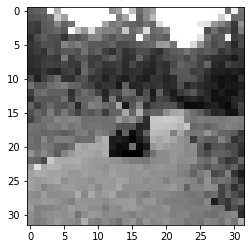

In [36]:

print(images)

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')


In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 50, 5)
        self.conv2 = nn.Conv2d(50, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(20*20*128, 1024)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        x = x.view(-1, 20*20*128)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [59]:
model = Net()
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [60]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [61]:
import torch.optim as optim
import torch.nn as nn
import torch
from tqdm import tqdm
import torch.nn.functional as F
import numpy as np


# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [50, 1, 5, 5], but got 3-dimensional input of size [50, 32, 32] instead